In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
# To dataset into 'k' equal sizes.
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
# validation/ accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import seaborn as sns
sns.set()

In [2]:
# assign variable for knn model

In [3]:
knn=KNeighborsClassifier()

In [4]:
# import data and read data from csv file

In [5]:
data = pd.read_csv('C:/Users/Pritam/Downloads/archive/diabetes.csv')

In [6]:
# read first 5 data from csv file

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# check data is in standerd distribution/standerd scaler

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

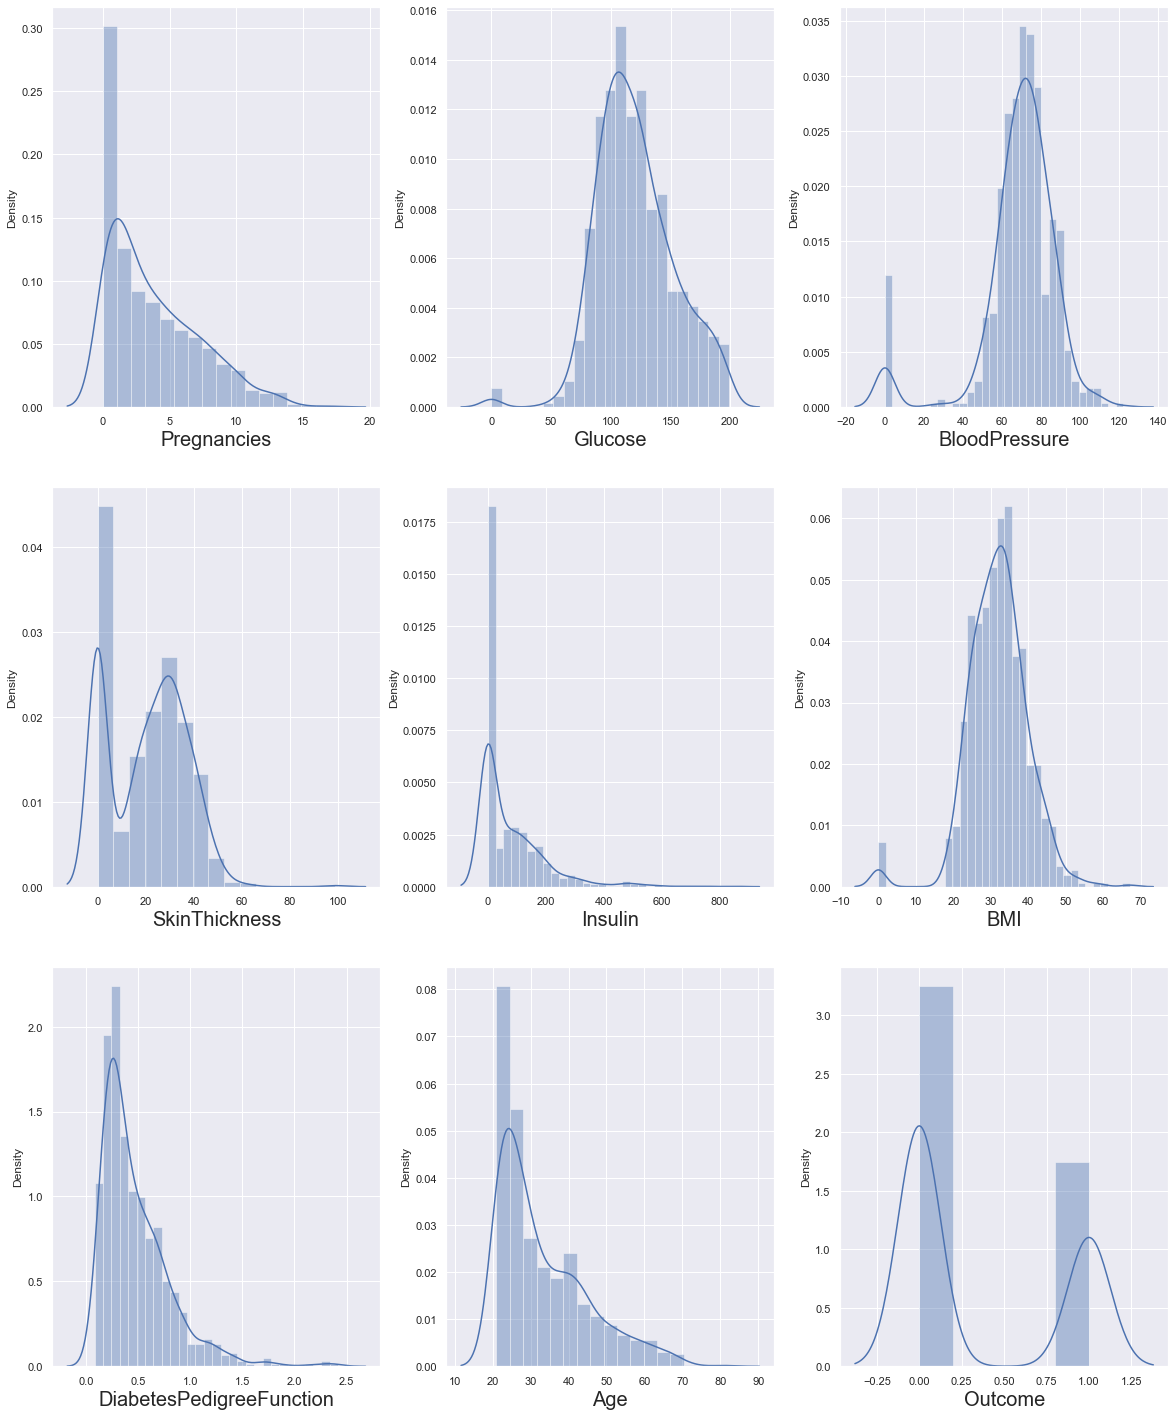

In [11]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.show()
        
        

### We can see there is some skewness in the data, let's deal with data.

### Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.


In [12]:
# replace 0 values with mean of that perticular column 

In [13]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']= data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

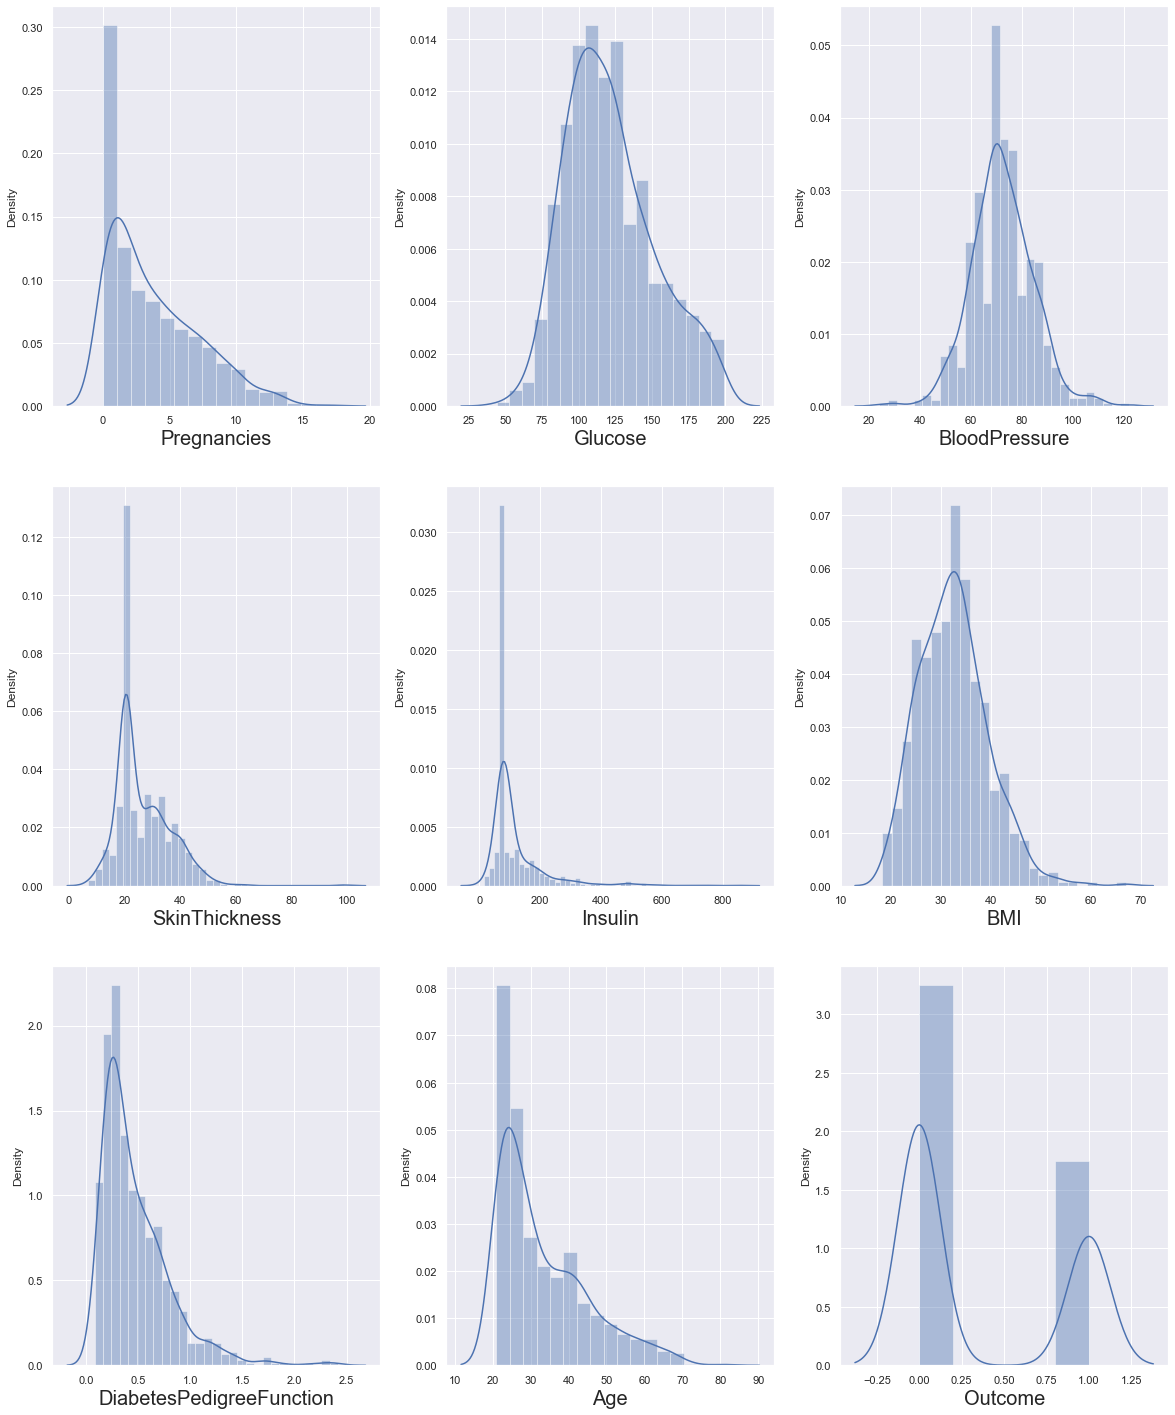

In [14]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnumber=1
for column in data :
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [16]:
# box plot is show outliers and value of outliers. how your data tightly grouped and howhow your data is skewed.
# Here it show glucose has little bit outliers , blod pressure is also have outliers and insulun has lots of outliers ,skinthickness has outliers, BMI has outliers, age is also have ouliers

<AxesSubplot:>

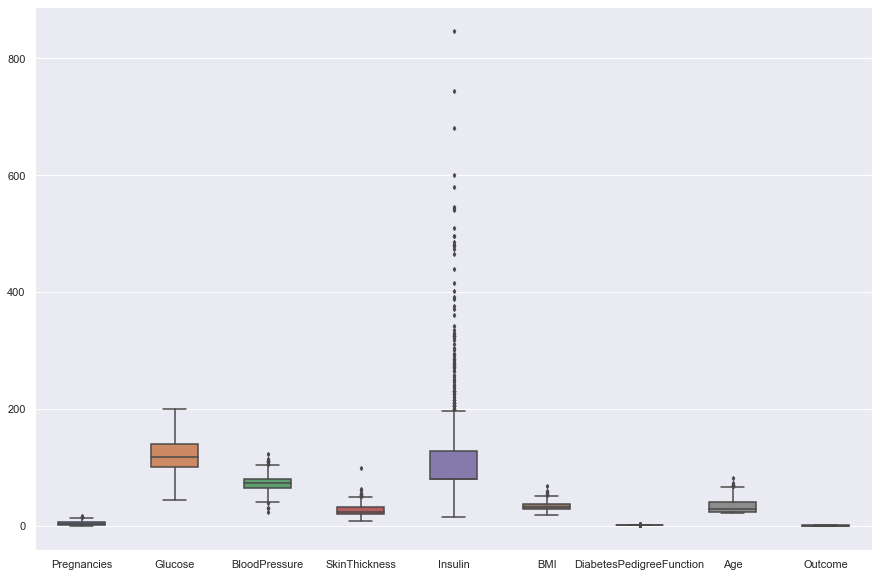

In [15]:
fig, ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5,ax=ax,fliersize=3)

In [17]:
# we remove the some outliers

In [29]:
q = data['Pregnancies'].quantile(0.98)
cleaned_data = data[data['Pregnancies']<q]
# remove top  2% data from Pregnecy column
q = data['SkinThickness'].quantile(0.99)
data_cleaned = data[data['SkinThickness']<q]
# we removetop 1% data from SkinThickess column
q=data['Insulin'].quantile(0.95)
cleaned_data = data[data['Insulin']<q]
# remove Top 5 % data from Insulin column
q=data['BMI'].quantile(0.99)
cleaned_data=data[data['BMI']<q]
# remove top 1 % data from BMI column
q = data['DiabetesPedigreeFunction'].quantile(0.99)
cleaned_data = data[data['DiabetesPedigreeFunction']<q]
# remove top 1% from DiabetesPedigreeFunction
q=data['Age'].quantile(0.99)
cleaned_data = data[data['Age']<q]

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

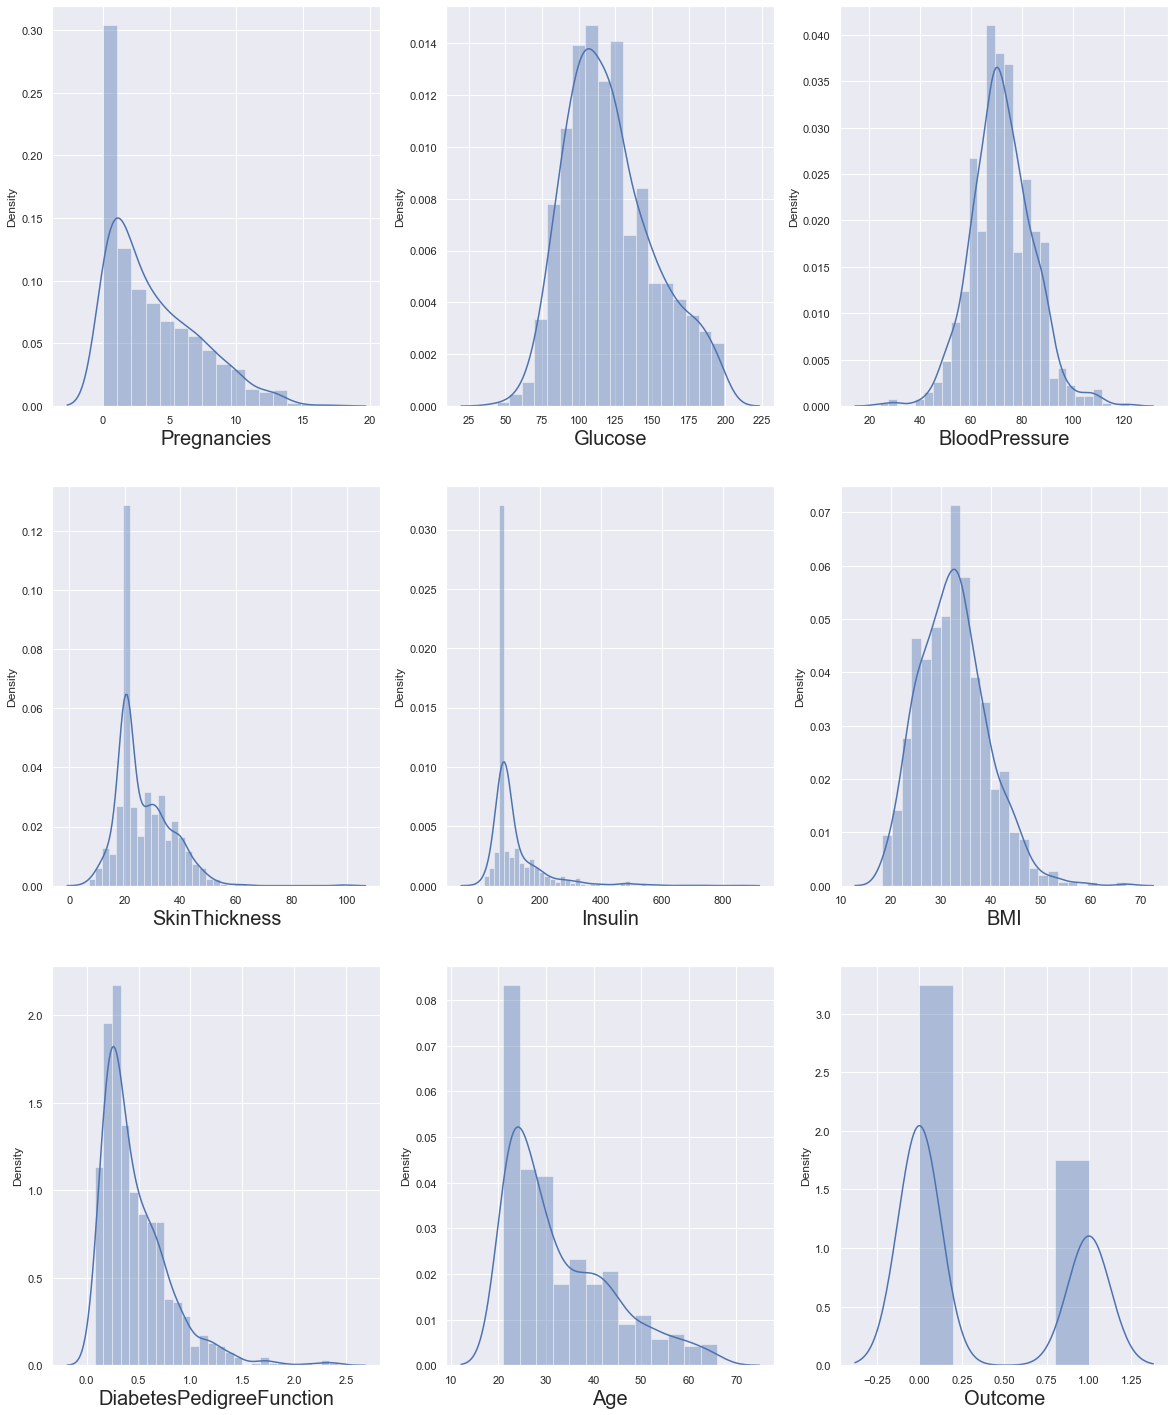

In [35]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in cleaned_data:
    if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.distplot(cleaned_data[column])
            plt.xlabel(column,fontsize=20)
            
    plotnumber+=1
plt.show()
    

In [36]:
# Divide the the data into train and test

In [65]:
#cleaned_data
x=data.drop(columns='Outcome')
#y=pd.DataFrame(data['Outcome'])
y=data['Outcome']

In [66]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [67]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [68]:
# check the string plot on trainn and test data
#  let's see how data is distributed for every column

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pritam\ana

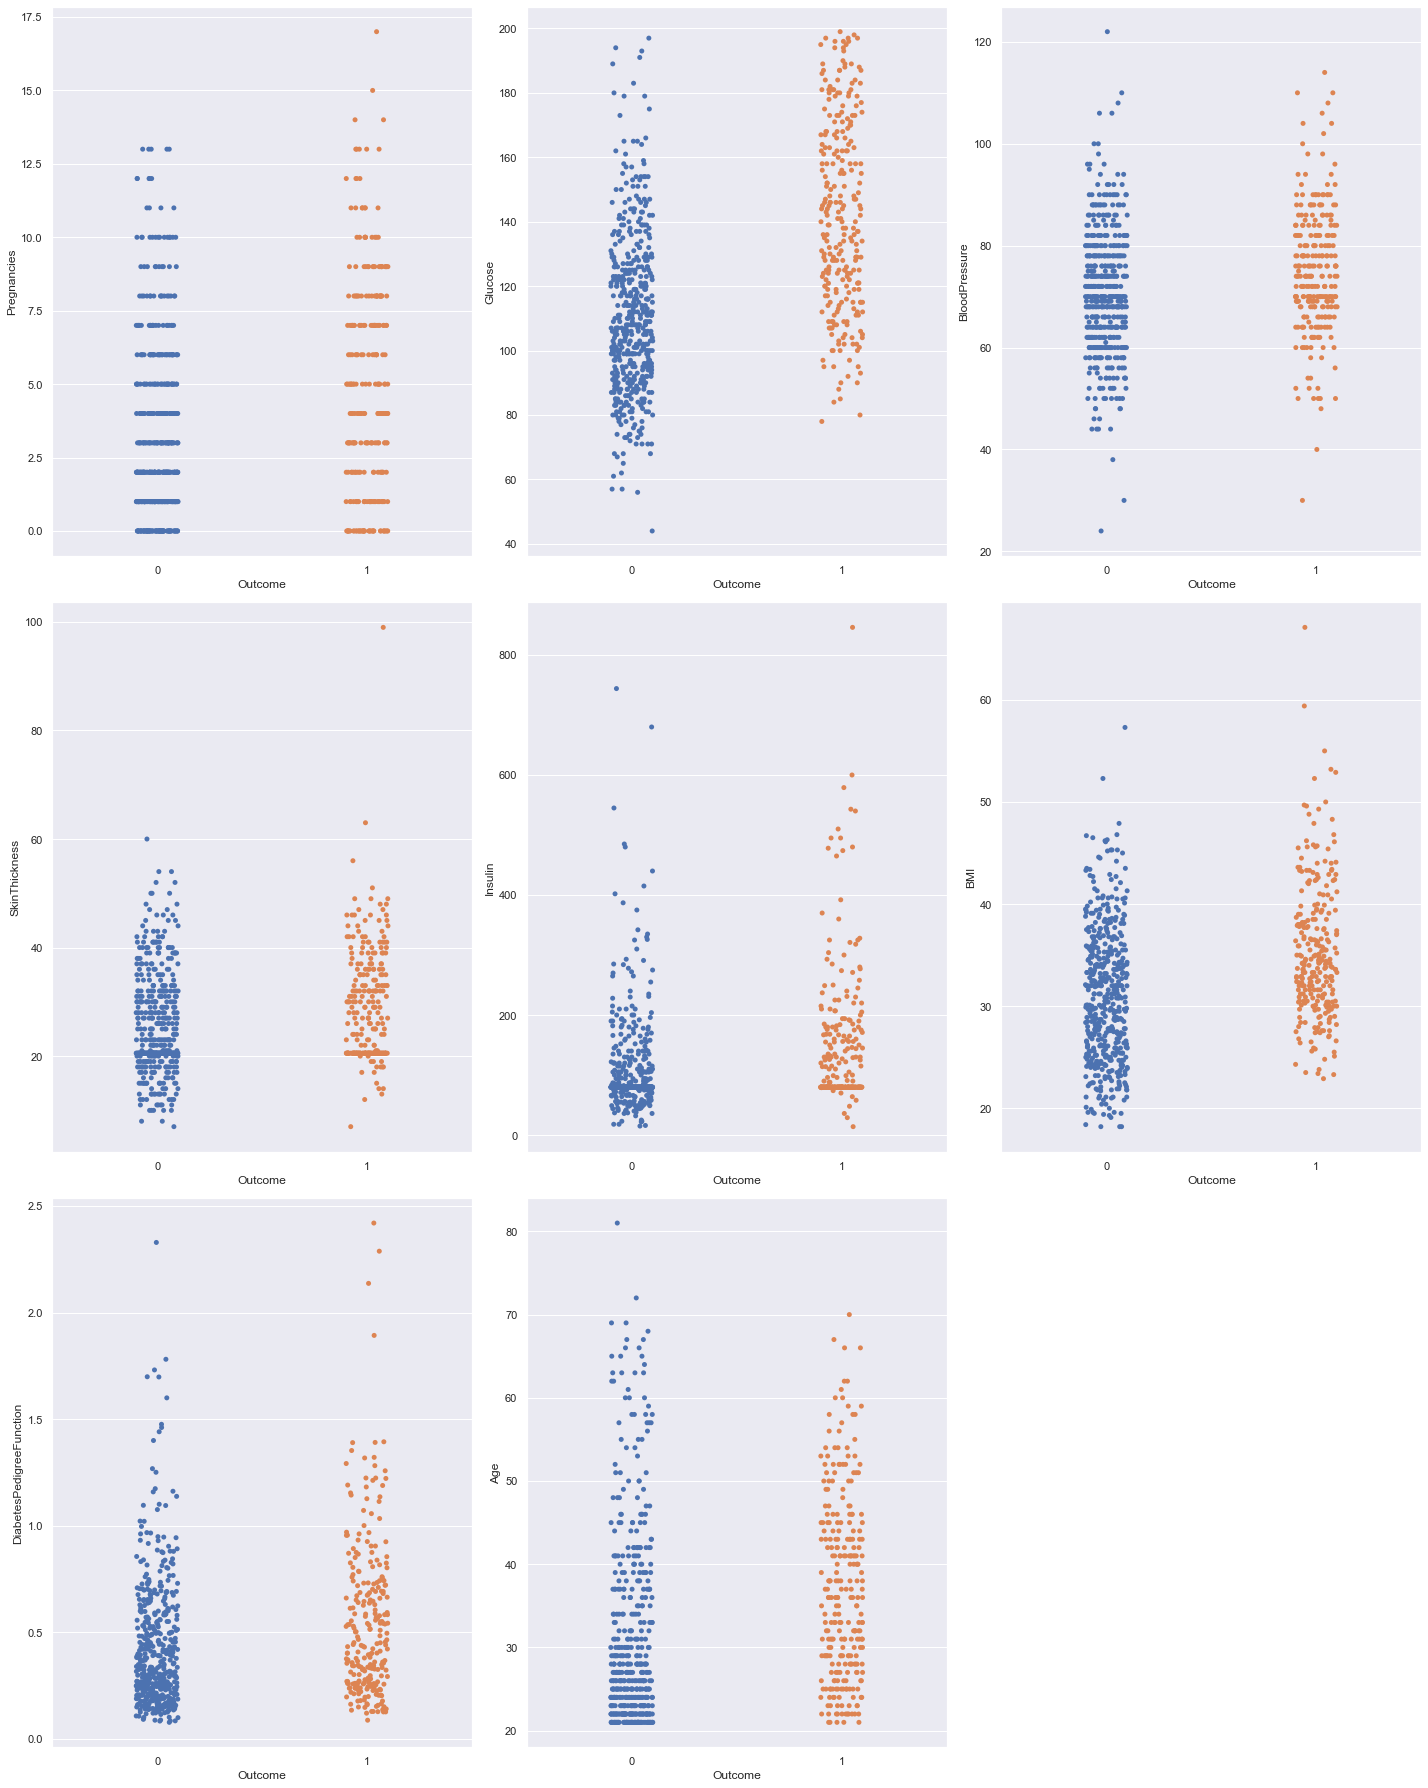

In [69]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        #sns.stripplot(y,x[column])
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

### Great!! Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

In [73]:
# standerdize data
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [80]:
# to check multicollinearity or not by variance inflation factor

Vif=pd.DataFrame()
Vif['Vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif['Features']=x.columns

Vif



,Vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=1/3)

In [87]:
#  let's fit the data into kNN model and see how well it performs:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [103]:
y_predict=knn.predict(x_test)

In [104]:
y_predict.shape

(256,)

In [106]:
y_test.shape

(256,)

In [100]:
# accuracy score of training model

In [101]:
knn.score(x_train,y_train)

0.80859375

In [107]:
# accuracy score 
test_prediction = accuracy_score(y_test,y_predict)

In [108]:
test_prediction

0.6953125

In [109]:
# Lets improve the accuracy with hyperparametertuning

In [122]:
param_grid = {'algorithm':['ball_tree','kd_tree','brute'],
              'leaf_size':[18,20,25,27,30,32,34],
              'n_neighbors':[3,5,7,9,10,11,12,13]}

In [123]:
param_grid

{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'leaf_size': [18, 20, 25, 27, 30, 32, 34],
 'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]}

In [124]:
gridsearch = GridSearchCV(knn,param_grid,verbose=3)

In [125]:
gridsearch

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [126]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.680 total time=   2.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.716 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.755 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.794 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.718 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.670 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.696 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.745 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.765 total 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [131]:
# check the best params
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 11}

In [137]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn=KNeighborsClassifier(algorithm = 'ball_tree', leaf_size= 18, n_neighbors= 11)
#knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [138]:
knn

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [139]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [140]:
knn.score(x_train,y_train)

0.7890625

## Looks like accuracy for training has decreased, maybe our model was overfitting the data before. Let's see how it perfroms on the test data.

In [144]:
knn.score(x_test,y_test)

0.7109375

##  Great, accuracy score has increased for our test data. So, indeed our model was overfitting before. Now, it looks better.
##  Let's now use k-fold cross validation and check how well our model is generalizing over our dataset: We are randomly selecting our k to be 12 for k fold.

In [154]:
#kfold = KFold(n_splits=12,random_state=42)
kfold = KFold(n_splits=12,random_state= None)
kfold.get_n_splits(x_scaled)

12

In [158]:
from statistics import mean
cnt=0
count=[]
train_score=[]
test_score=[]

for train_index,test_index in kfold.split(x_scaled):
    x_train=x_scaled[train_index]
    x_test=x_scaled[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]
    cnt+=1
    count.append(cnt)
    knn.fit(x_train,y_train)
    train_score_=knn.score(x_train,y_train)
    test_score_=knn.score(x_test,y_test)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    
    print('K is for ',cnt)
    print('train score is ',train_score_)
    print('test score is',test_score_)
print('**********************************************')
print('**********************************************')
print('average train score is :',mean(train_score))
print('average test score is :', mean(test_score))
    


K is for  1
train score is  0.8068181818181818
test score is 0.6875
K is for  2
train score is  0.7926136363636364
test score is 0.765625
K is for  3
train score is  0.7954545454545454
test score is 0.78125
K is for  4
train score is  0.7997159090909091
test score is 0.734375
K is for  5
train score is  0.7940340909090909
test score is 0.65625
K is for  6
train score is  0.7954545454545454
test score is 0.765625
K is for  7
train score is  0.7997159090909091
test score is 0.703125
K is for  8
train score is  0.7926136363636364
test score is 0.734375
K is for  9
train score is  0.7840909090909091
test score is 0.890625
K is for  10
train score is  0.7997159090909091
test score is 0.796875
K is for  11
train score is  0.7997159090909091
test score is 0.734375
K is for  12
train score is  0.7911931818181818
test score is 0.8125
**********************************************
**********************************************
average train score is : 0.7959280303030303
average test score is : 0

Text(0, 0.5, 'test_score')

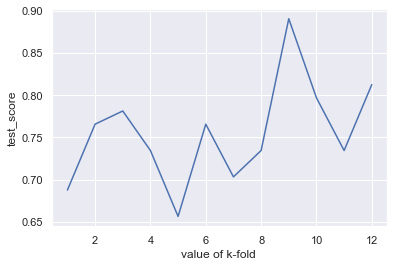

In [192]:
plt.plot(count,test_score)
plt.xlabel('value of k-fold ')
plt.ylabel('test_score')
#plt.show()
#plt.xticks(np.arange(0, 12, 1)) 
#plt.xticks(np.arange(0,12,2))
#plt.yticks(np.arange(0.65,0.95,0.05))
#plt.grid()